# <span style= 'color:#21E9C5' > **Melanoma or Not Melanoma EDA** </span>

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import pandas as pd

## <span style= 'color:#21E9C5' > **Sample Images Visualisation** </span>

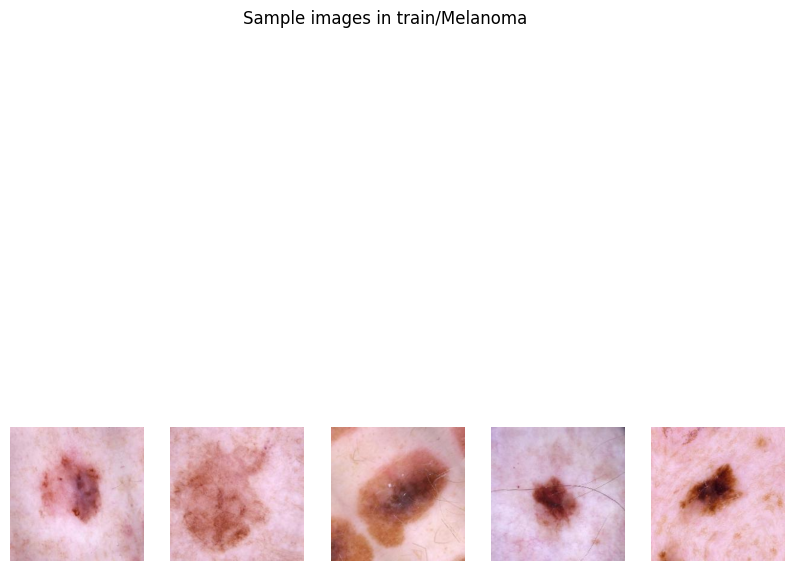

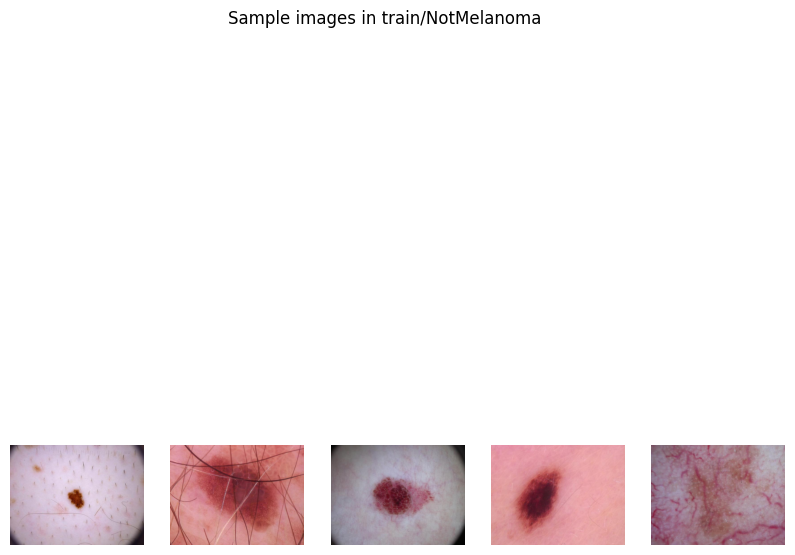

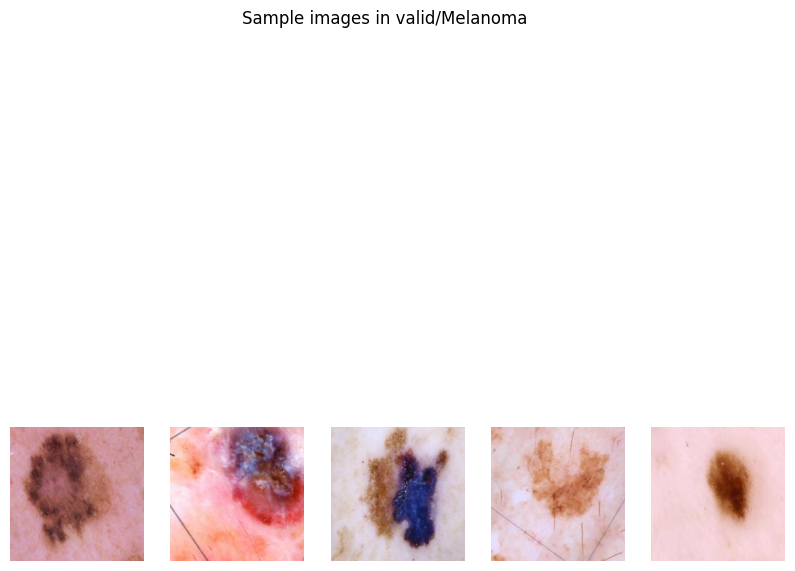

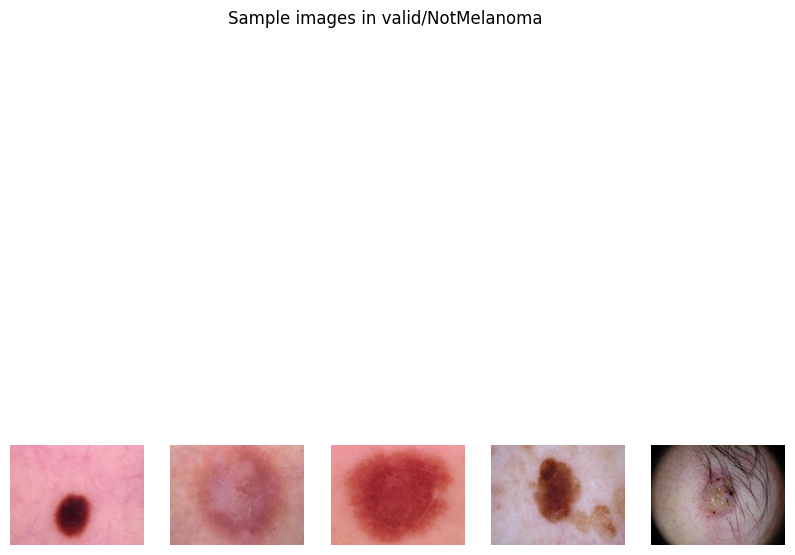

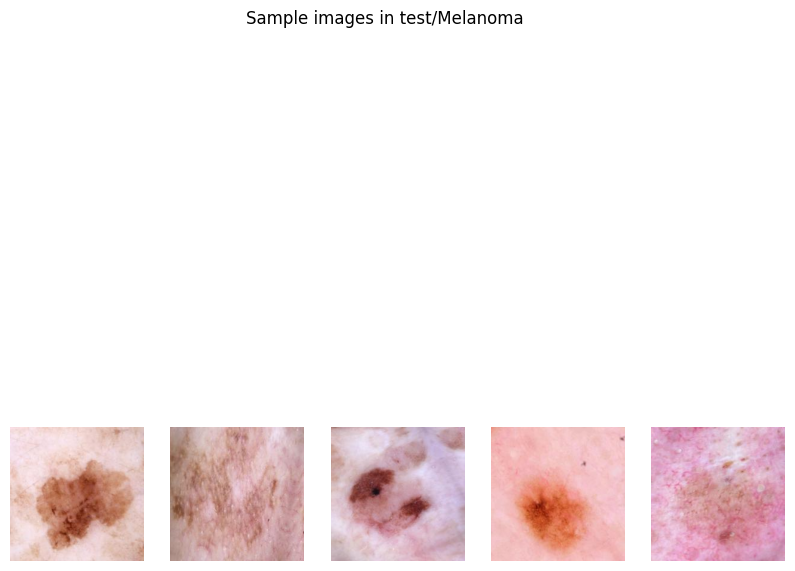

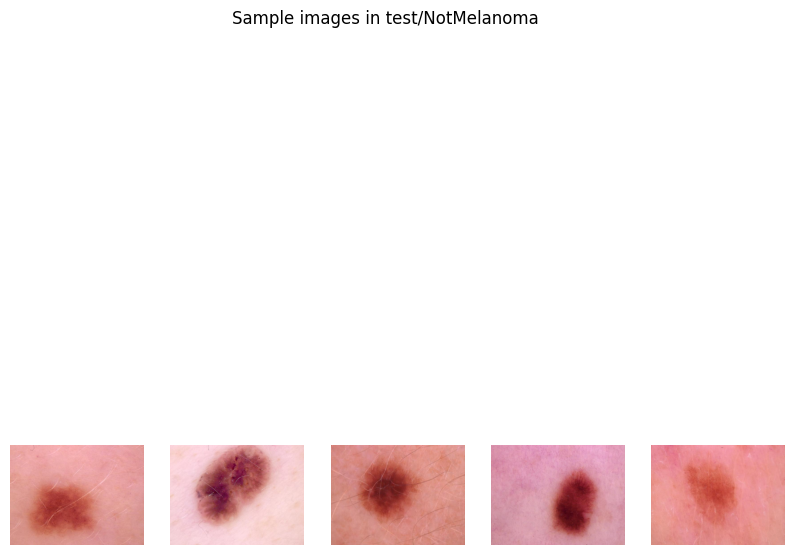

In [34]:
# Ruta a las carpetas con las imágenes
base_folder = "data"
sets = ['train', 'valid', 'test']
classes = ['Melanoma', 'NotMelanoma']

for set_name in sets:
    for class_name in classes:
        image_folder = os.path.join(base_folder, set_name, class_name)
        image_files = os.listdir(image_folder)
        sample_images = [os.path.join(image_folder, image_files[i]) for i in range(5)]

        plt.figure(figsize=(10, 10))
        for i, image_path in enumerate(sample_images):
            img = Image.open(image_path)
            plt.subplot(1, 5, i+1)
            plt.imshow(img)
            plt.axis('off')
        plt.suptitle(f'Sample images in {set_name}/{class_name}')
        plt.show()

## <span style= 'color:#21E9C5' > **Size / Resolution** </span>   
### <span style= 'color:#21E9C5' > After reviewing the images, I noticed that some of them had varying sizes. To ensure uniformity, I resized them so that all the images now have consistent dimensions.</span>

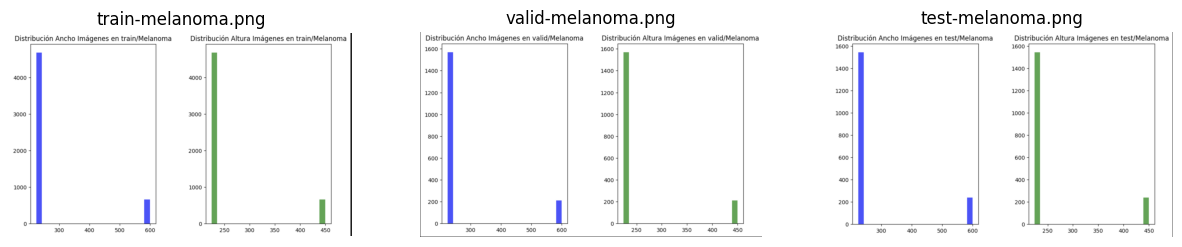

In [29]:
# Rutas a las imágenes
image_paths = [
    'assets/different_sizes/train-melanoma.png',
    'assets/different_sizes/valid-melanoma.png',
    'assets/different_sizes/test-melanoma.png'
]

# Mostrar las imágenes
plt.figure(figsize=(15, 5))  # Ajustar el tamaño de la figura para acomodar las imágenes

for i, image_path in enumerate(image_paths):
    img = Image.open(image_path)
    plt.subplot(1, len(image_paths), i + 1)  # Crear subplots para cada imagen
    plt.imshow(img)
    plt.title(image_path.split('/')[-1])  # Usar el nombre del archivo como título
    plt.axis('off')  # Ocultar los ejes

plt.show()

## <span style= 'color:#21E9C5' > **Resize** </span>   


Tamaños en train/Melanoma:
   Width  Height  Count
0    224     224   5341

Tamaños en train/NotMelanoma:
   Width  Height  Count
0    600     450   5341

Tamaños en valid/Melanoma:
   Width  Height  Count
0    224     224   1781

Tamaños en valid/NotMelanoma:
   Width  Height  Count
0    600     450   1781

Tamaños en test/Melanoma:
   Width  Height  Count
0    224     224   1781

Tamaños en test/NotMelanoma:
   Width  Height  Count
0    600     450   1780


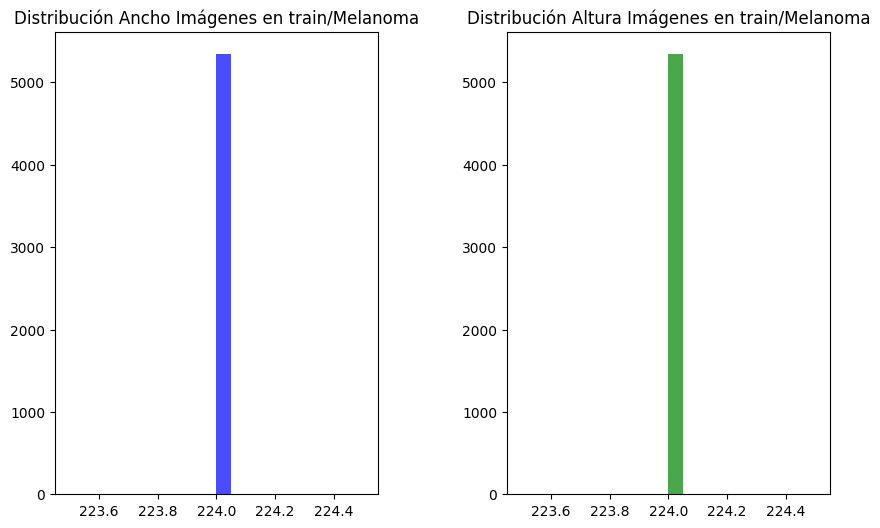

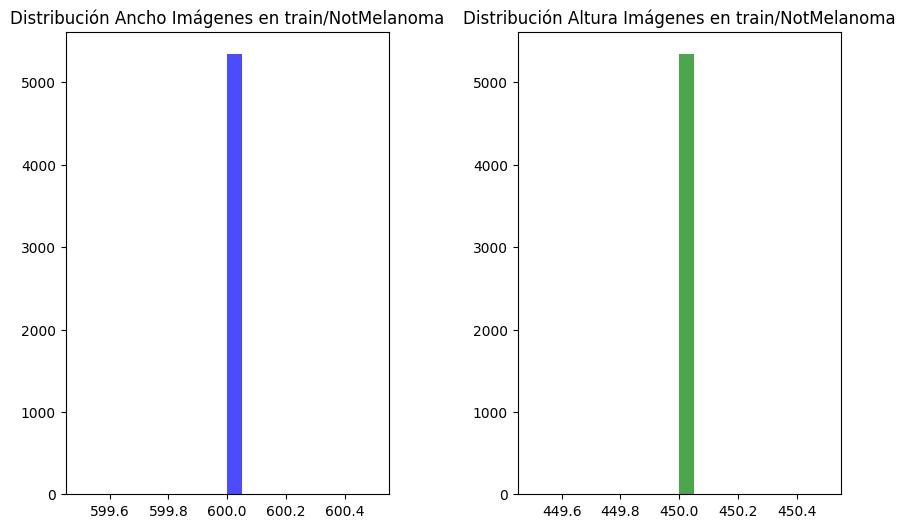

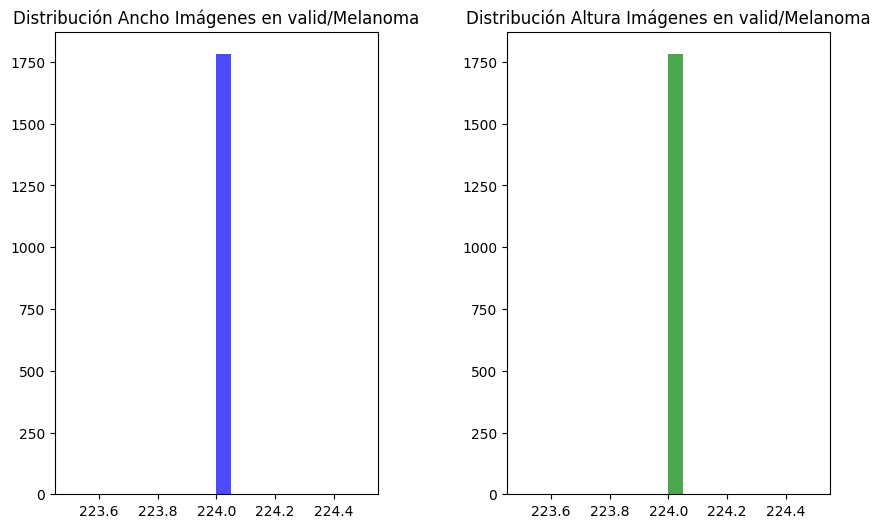

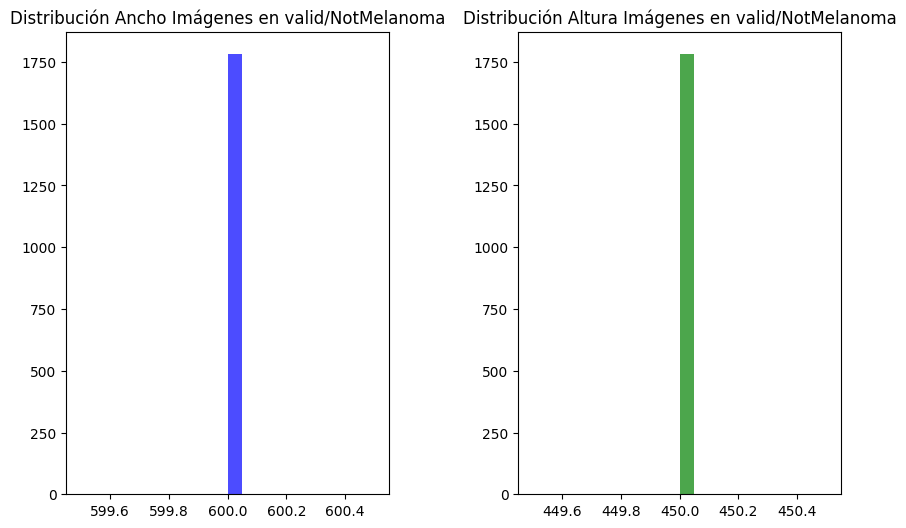

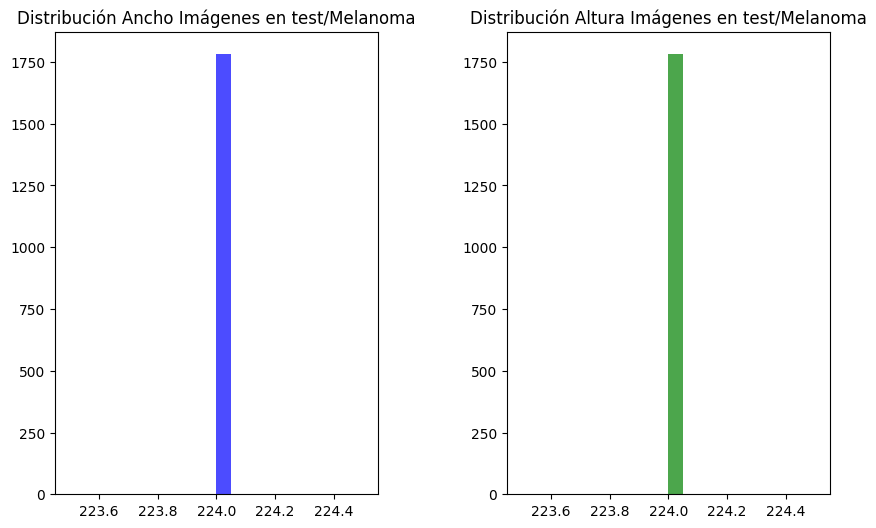

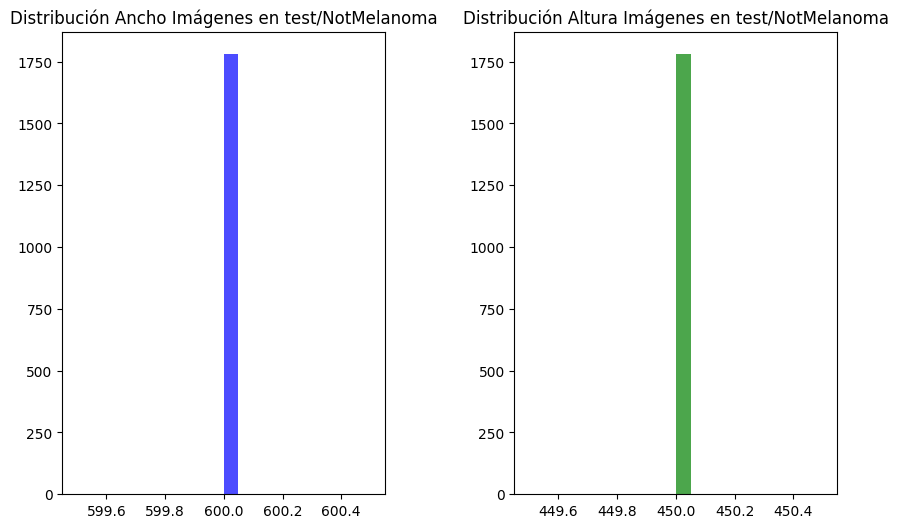

In [31]:
# Inicialización de la estructura para almacenar los tamaños de las imágenes
image_sizes = {}

for set_name in sets:
    for class_name in classes:
        image_folder = os.path.join(base_folder, set_name, class_name)
        image_files = os.listdir(image_folder)
        sizes = []
        for image_file in image_files:
            img = Image.open(os.path.join(image_folder, image_file))
            sizes.append(img.size)
        image_sizes[f'{set_name}/{class_name}'] = sizes

        # Convertir a un DataFrame para análisis más detallado
        size_df = pd.DataFrame(sizes, columns=['Width', 'Height'])
        
        # Contar el número de imágenes por cada tamaño y resolución
        size_counts = size_df.value_counts().reset_index(name='Count')

        print(f"\nTamaños en {set_name}/{class_name}:")
        print(size_counts)

for key, sizes in image_sizes.items():
    widths, heights = zip(*sizes)
    plt.figure(figsize=(10, 6))
    
    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=20, color='blue', alpha=0.7)
    plt.title(f'Distribución Ancho Imágenes en {key}')
    
    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=20, color='green', alpha=0.7)
    plt.title(f'Distribución Altura Imágenes en {key}')
    
    # Ajustar el espacio entre subplots
    plt.subplots_adjust(wspace=0.4)  # Incrementar este valor si es necesario
    
    plt.show()


## <span style= 'color:#21E9C5' > **Format & Colour Channels** </span>
### <span style= 'color:#21E9C5'> All the images in the train, valid, and test sets are in JPEG format. This is a good indicator because it means there won't be issues related to mixed formats, so no additional format conversion is necessary. Additionally, all the images in the different sets and classes are in RGB, so there's no need to convert grayscale images to RGB or vice versa, which is also very good.</span>

In [32]:
from collections import Counter

formats = {}
color_modes = {}

for set_name in sets:
    for class_name in classes:
        image_folder = os.path.join(base_folder, set_name, class_name)
        image_files = os.listdir(image_folder)
        folder_formats = []
        folder_color_modes = []
        for image_file in image_files:
            img = Image.open(os.path.join(image_folder, image_file))
            folder_formats.append(img.format)
            folder_color_modes.append(img.mode)
        formats[f'{set_name}/{class_name}'] = Counter(folder_formats)
        color_modes[f'{set_name}/{class_name}'] = Counter(folder_color_modes)

for key in formats:
    print(f"Image Formats in {key}: {formats[key]}")
    print(f"Colour Modes in {key}: {color_modes[key]}")

Image Formats in train/Melanoma: Counter({'JPEG': 5341})
Colour Modes in train/Melanoma: Counter({'RGB': 5341})
Image Formats in train/NotMelanoma: Counter({'JPEG': 5341})
Colour Modes in train/NotMelanoma: Counter({'RGB': 5341})
Image Formats in valid/Melanoma: Counter({'JPEG': 1781})
Colour Modes in valid/Melanoma: Counter({'RGB': 1781})
Image Formats in valid/NotMelanoma: Counter({'JPEG': 1781})
Colour Modes in valid/NotMelanoma: Counter({'RGB': 1781})
Image Formats in test/Melanoma: Counter({'JPEG': 1781})
Colour Modes in test/Melanoma: Counter({'RGB': 1781})
Image Formats in test/NotMelanoma: Counter({'JPEG': 1780})
Colour Modes in test/NotMelanoma: Counter({'RGB': 1780})


## <span style= 'color:#21E9C5' > **Classes Distribution** </span>
### <span style= 'color:#21E9C5' >The dataset as a whole is very well balanced in terms of class distribution. Both the training set and the validation and test sets have an almost identical number of images per class. This balance is very important for training a robust and reliable model and for evaluating its performance fairly. A balanced dataset helps prevent bias and ensures that the model can generalize better to new data.</span>

Number of images in train/Melanoma: 5341
Number of images in train/NotMelanoma: 5341
Number of images in valid/Melanoma: 1781
Number of images in valid/NotMelanoma: 1781
Number of images in test/Melanoma: 1781
Number of images in test/NotMelanoma: 1780


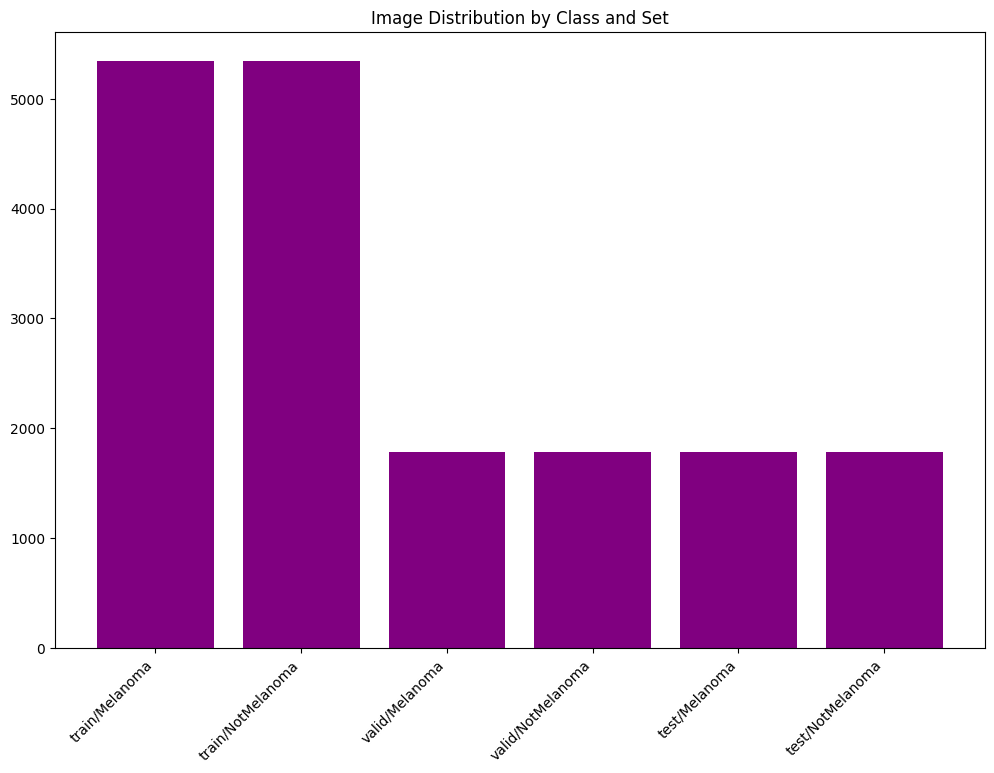

In [33]:
class_distribution = {}

for set_name in sets:
    for class_name in classes:
        image_folder = os.path.join(base_folder, set_name, class_name)
        num_images = len(os.listdir(image_folder))
        class_distribution[f'{set_name}/{class_name}'] = num_images

# Mostrar distribución de clases
for key, count in class_distribution.items():
    print(f'Number of images in {key}: {count}')

# Visualización de la distribución
labels, counts = zip(*class_distribution.items())
plt.figure(figsize=(12, 8))
plt.bar(labels, counts, color='purple')
plt.xticks(rotation=45, ha='right')
plt.title('Image Distribution by Class and Set')
plt.show()

## <span style= 'color:#21E9C5' > **Statistical Characteristics of Pixels** </span>
### <span style= 'color:#21E9C5' >The dataset shows consistent differences in mean pixel values and variability between Melanoma and NotMelanoma images, with Melanoma images generally having higher and more variable pixel intensities. This consistency across the train, validation, and test sets suggests that the model will have a stable basis for learning these differences.</span>

In [11]:
import gc

for set_name in sets:
    for class_name in classes:
        image_folder = os.path.join(base_folder, set_name, class_name)
        pixel_values = []
        image_files = os.listdir(image_folder)[:100]  # Procesar solo las primeras 100 imágenes
        for image_file in image_files:
            img = cv2.imread(os.path.join(image_folder, image_file))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB
            pixel_values.append(img.flatten())
        
        pixel_values = np.concatenate(pixel_values)
        mean = np.mean(pixel_values)
        std = np.std(pixel_values)

        print(f"Media de valores de píxeles en {set_name}/{class_name}: {mean}")
        print(f"Desviación estándar de valores de píxeles en {set_name}/{class_name}: {std}")

        # Limpiar memoria
        del pixel_values
        gc.collect()

Media de valores de píxeles en train/Melanoma: 165.0718041314501
Desviación estándar de valores de píxeles en train/Melanoma: 51.89366347695899
Media de valores de píxeles en train/NotMelanoma: 159.32666365432098
Desviación estándar de valores de píxeles en train/NotMelanoma: 47.17581554005491
Media de valores de píxeles en valid/Melanoma: 169.01106421955075
Desviación estándar de valores de píxeles en valid/Melanoma: 50.97012086709394
Media de valores de píxeles en valid/NotMelanoma: 160.92426016049382
Desviación estándar de valores de píxeles en valid/NotMelanoma: 47.59971619022835
Media de valores de píxeles en test/Melanoma: 167.78047891889682
Desviación estándar de valores de píxeles en test/Melanoma: 52.2817506170092
Media de valores de píxeles en test/NotMelanoma: 161.5657738148148
Desviación estándar de valores de píxeles en test/NotMelanoma: 46.05857157370622


## <span style= 'color:#21E9C5' > **Pattern Analysis** </span>
### <span style= 'color:#21E9C5' >Edge detection is useful for distinguishing between melanomas and benign lesions. Irregular and well-defined edges are typical of melanomas, while smooth and scattered edges indicate characteristics of benign lesions. Although edge detection provides valuable information, it is not sufficient on its own for a complete diagnosis and should be complemented with other features and analyses to achieve an accurate evaluation.</span>

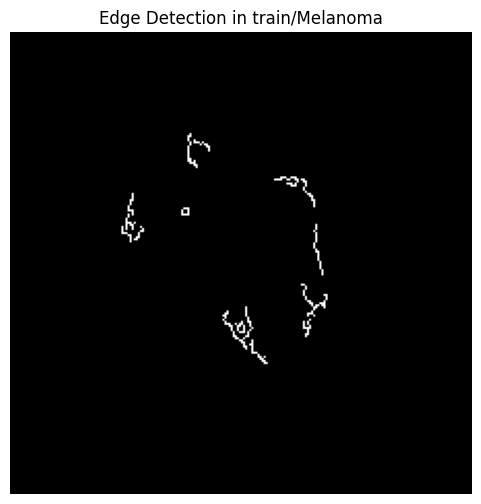

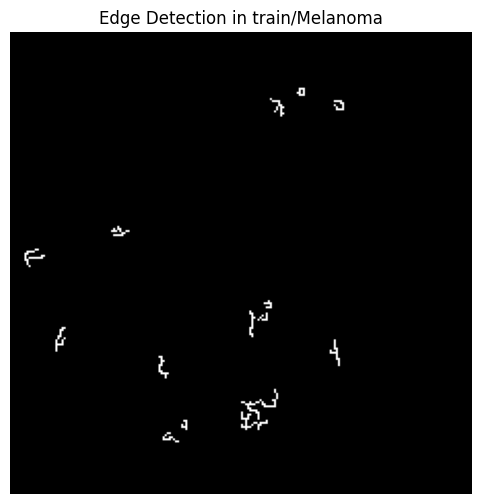

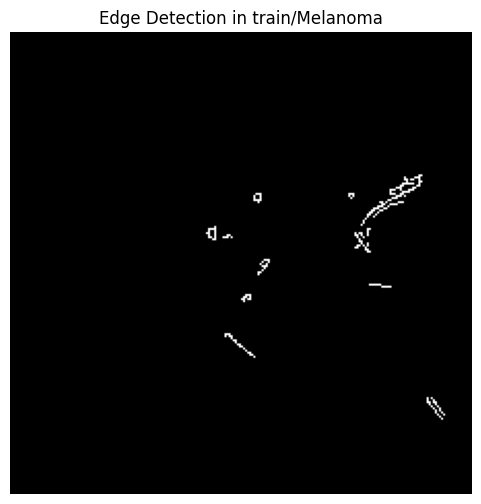

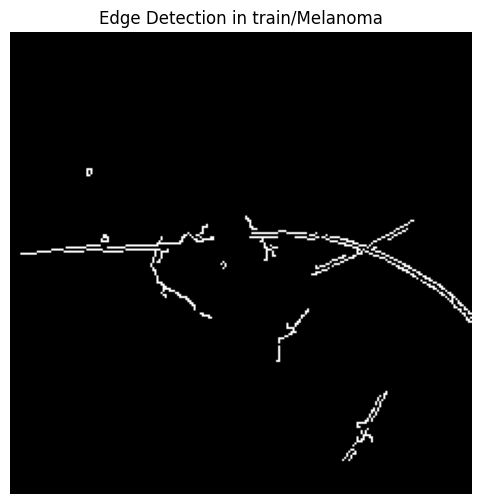

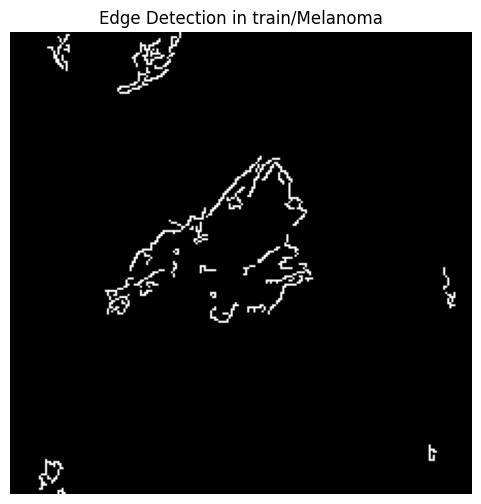

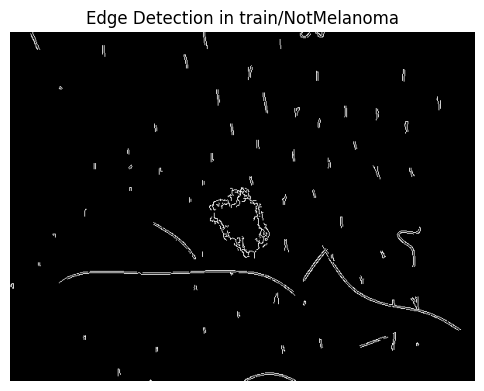

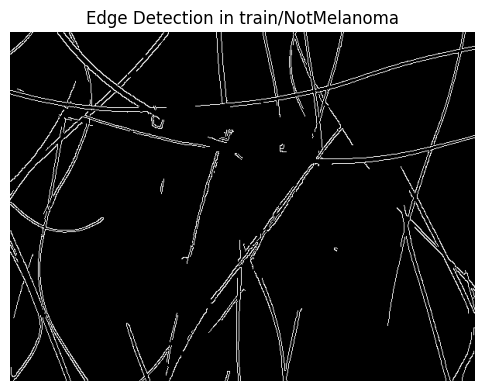

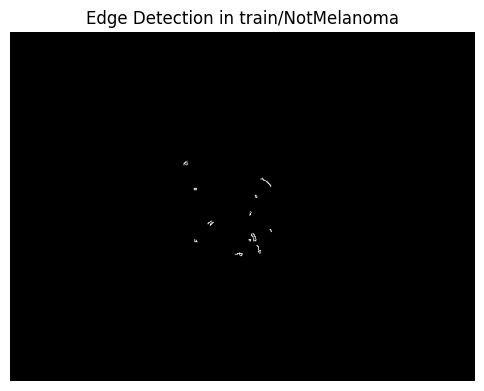

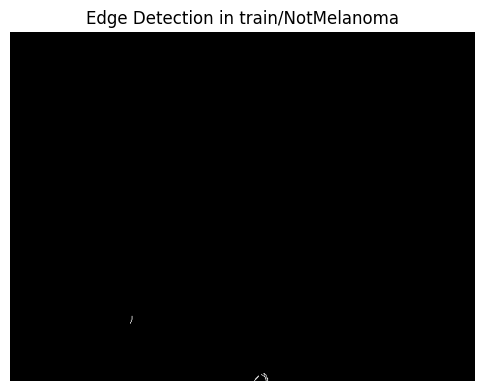

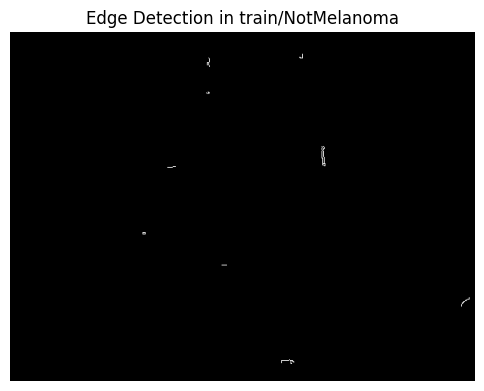

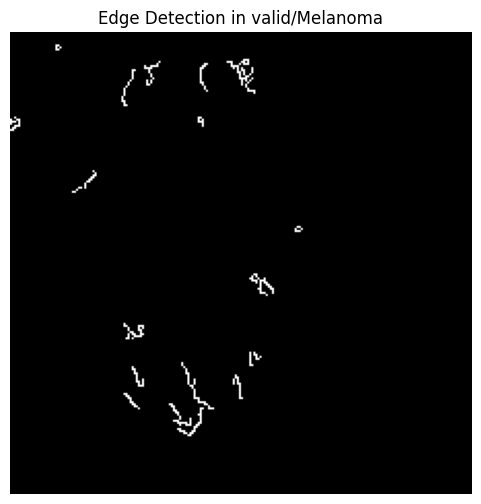

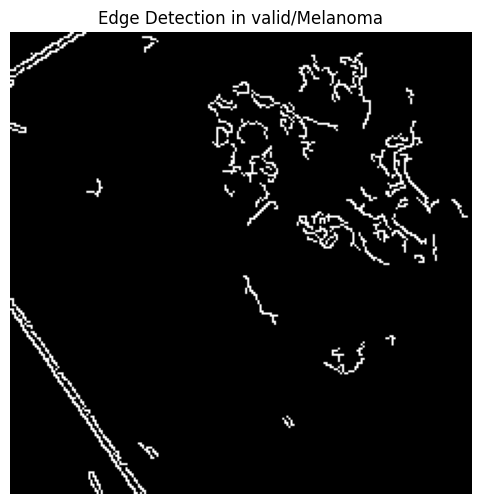

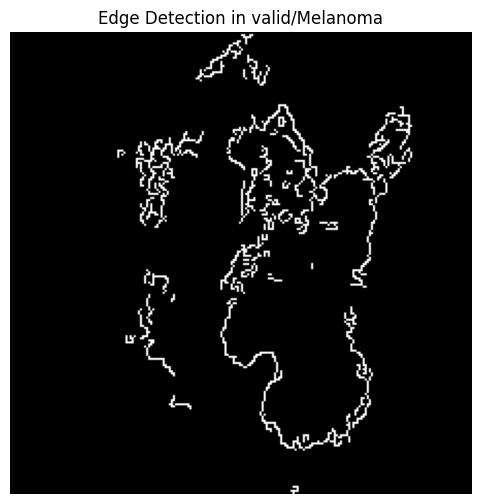

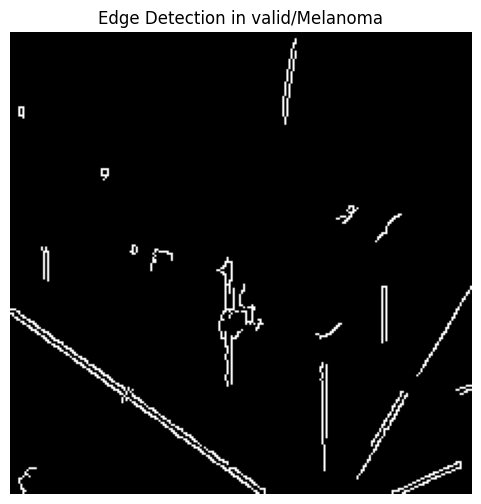

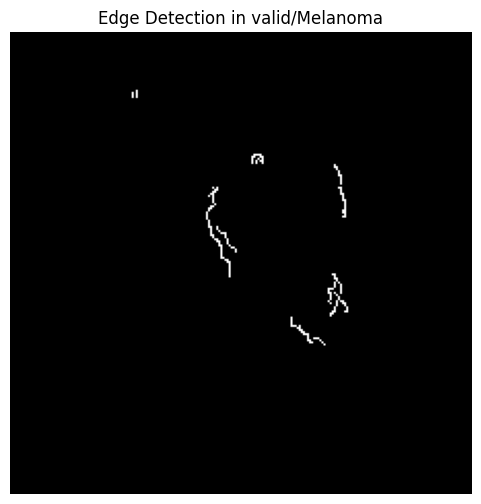

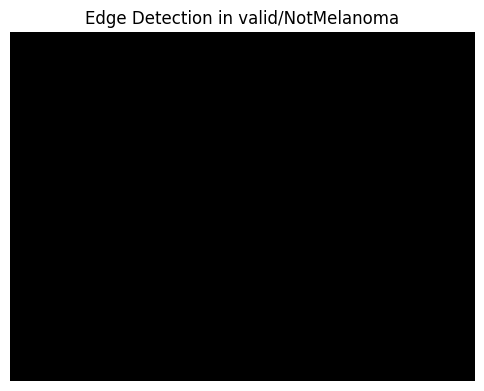

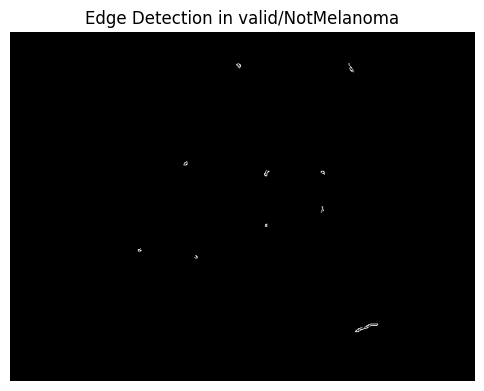

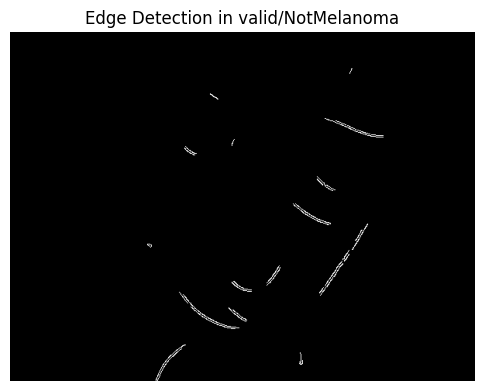

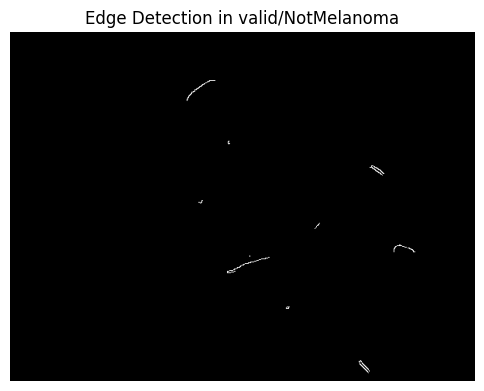

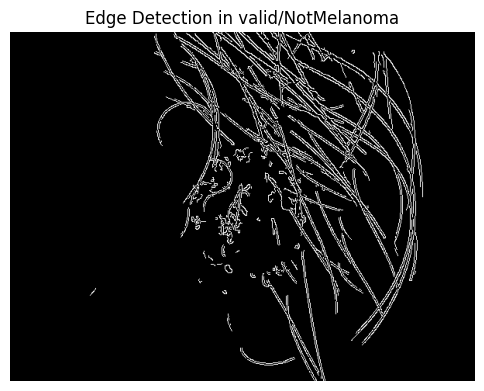

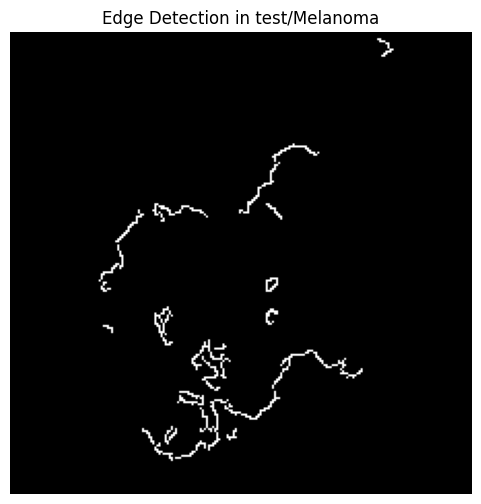

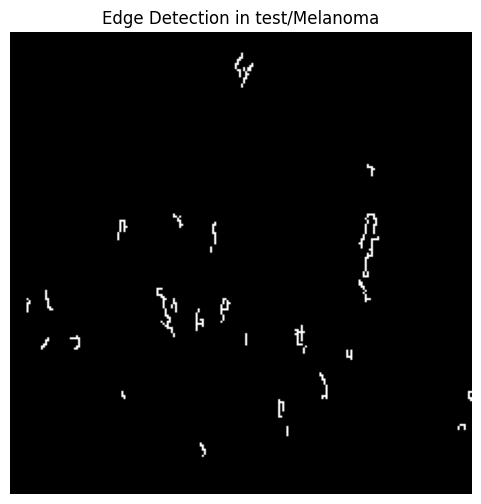

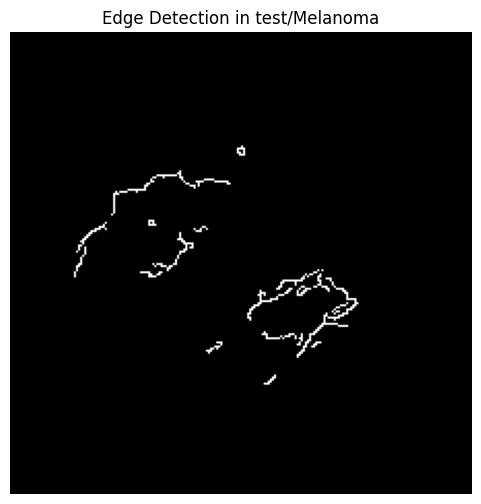

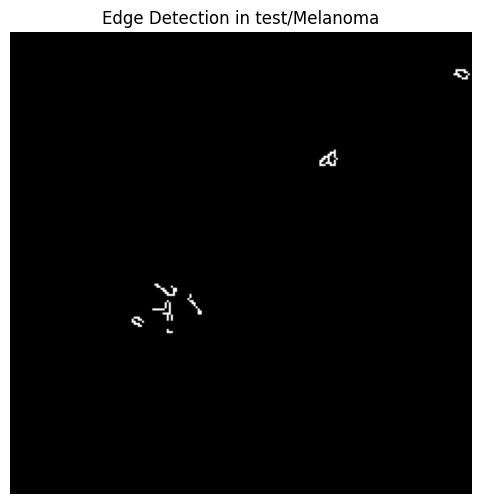

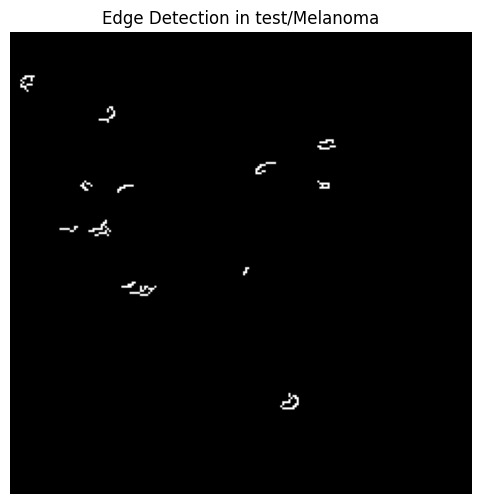

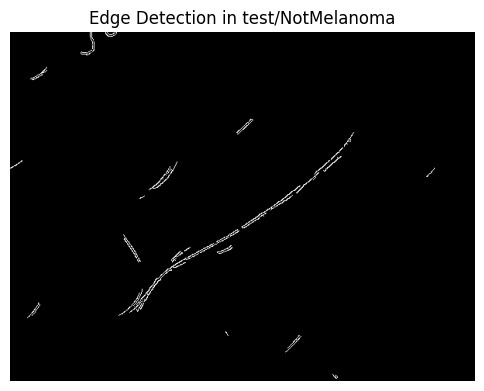

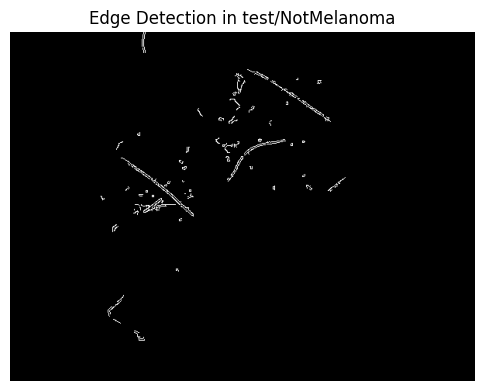

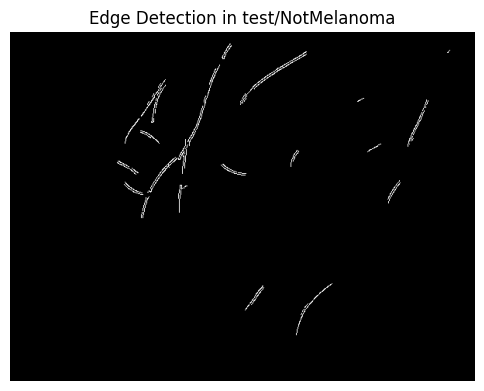

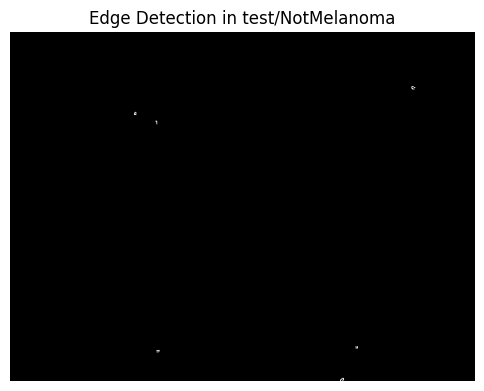

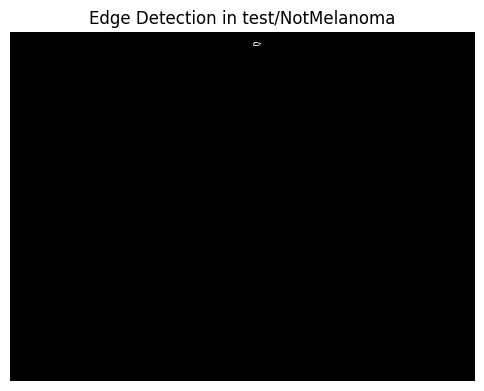

In [35]:
for set_name in sets:
    for class_name in classes:
        image_folder = os.path.join(base_folder, set_name, class_name)
        sample_images = [os.path.join(image_folder, img) for img in os.listdir(image_folder)[:5]]
        
        for image_file in sample_images:
            img = cv2.imread(image_file, 0)  # Cargar en escala de grises
            edges = cv2.Canny(img, 100, 200)

            plt.figure(figsize=(6, 6))
            plt.imshow(edges, cmap='gray')
            plt.title(f'Edge Detection in {set_name}/{class_name}')
            plt.axis('off')
            plt.show()

## <span style= 'color:#21E9C5' > **Data Augmentation** </span>

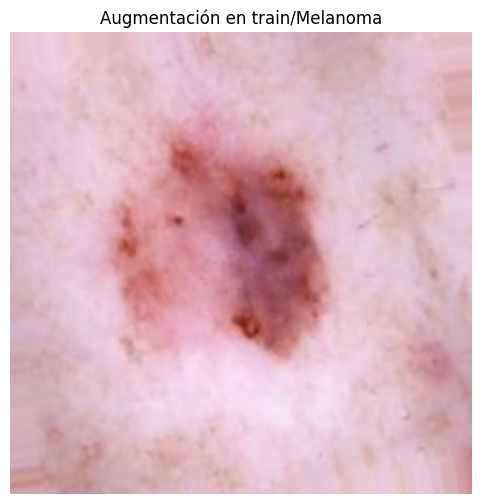

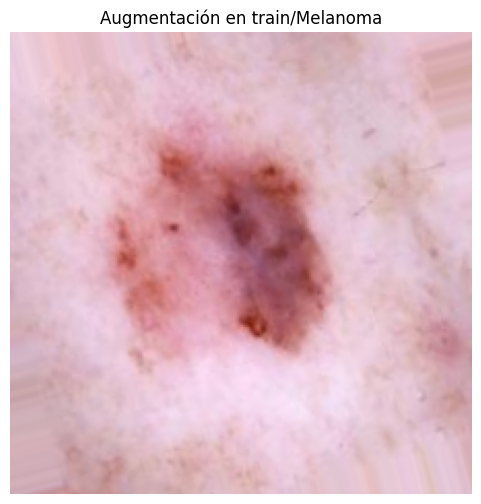

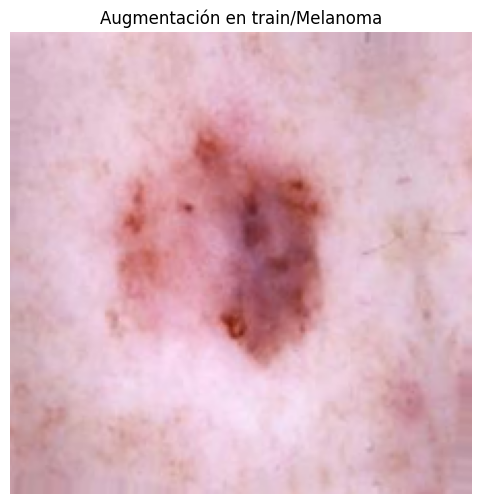

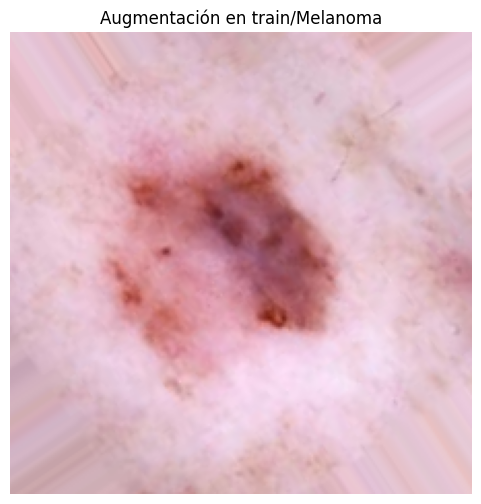

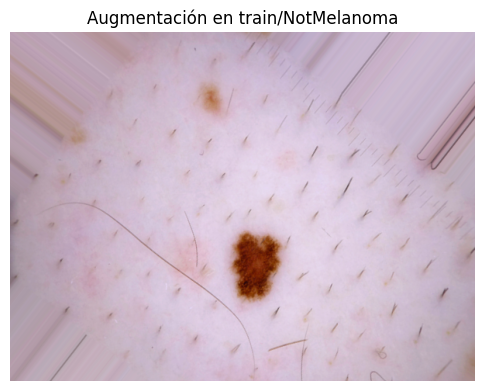

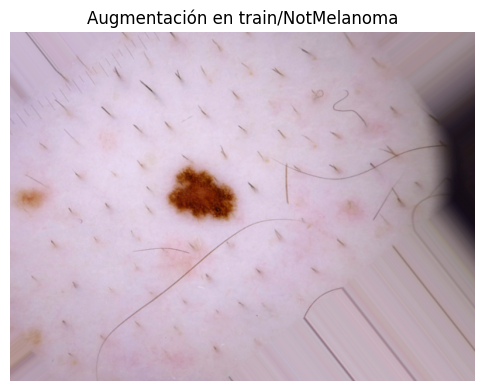

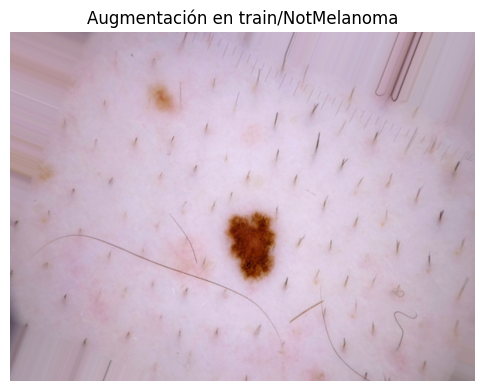

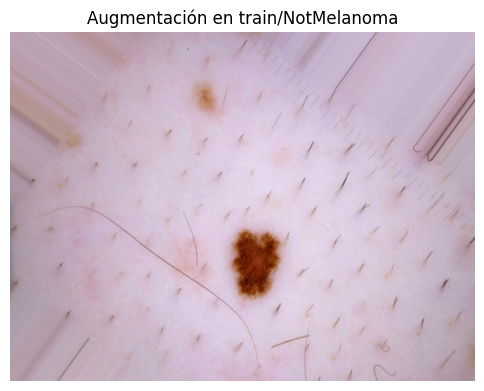

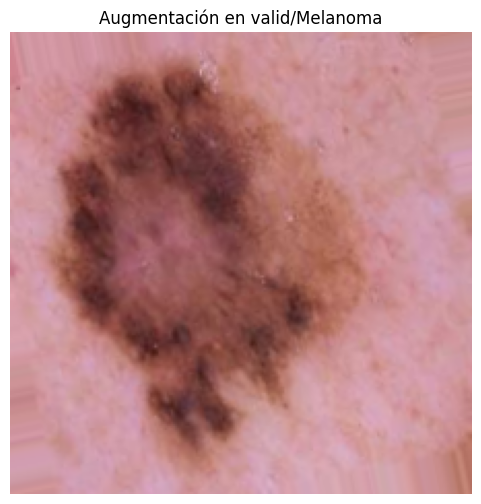

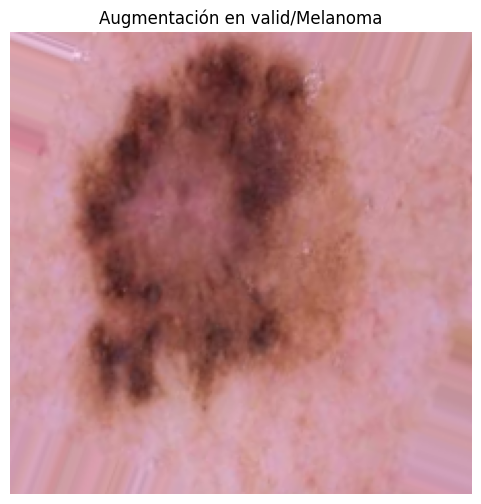

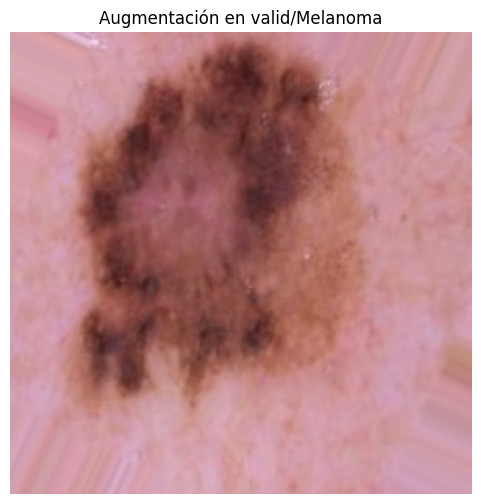

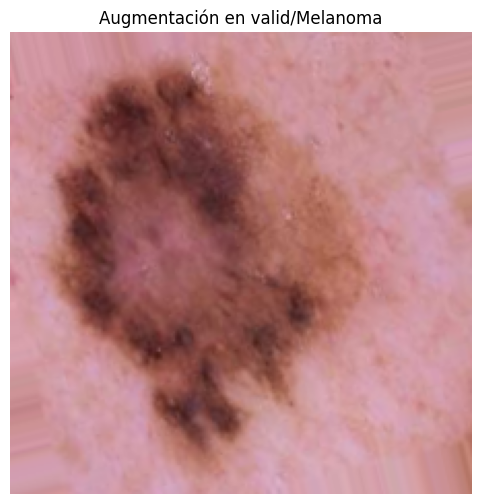

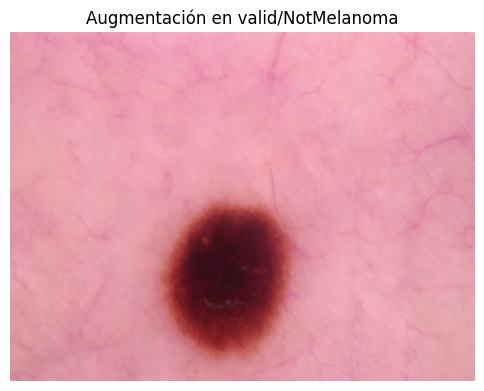

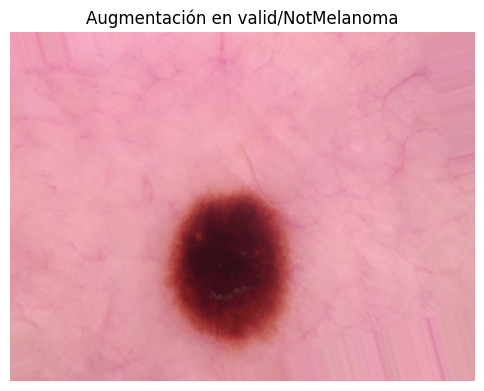

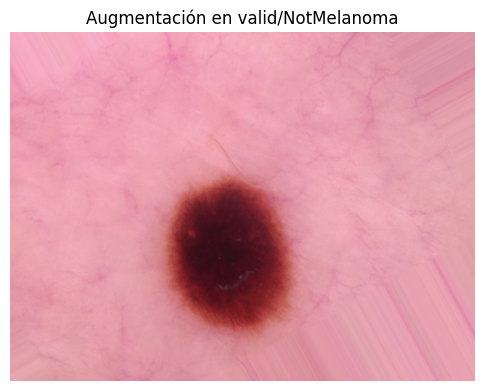

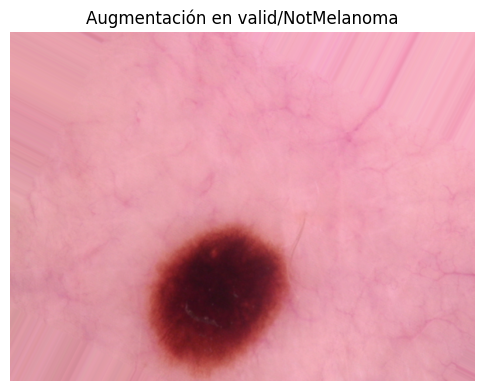

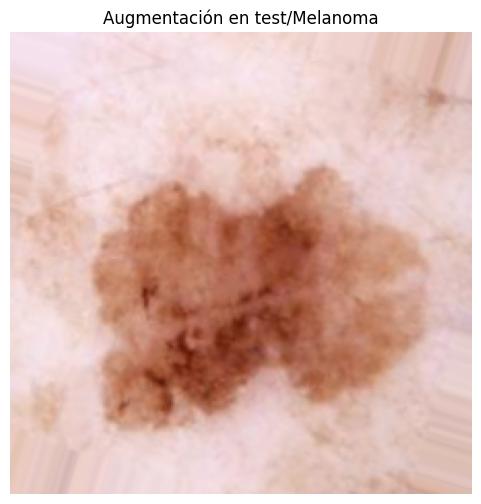

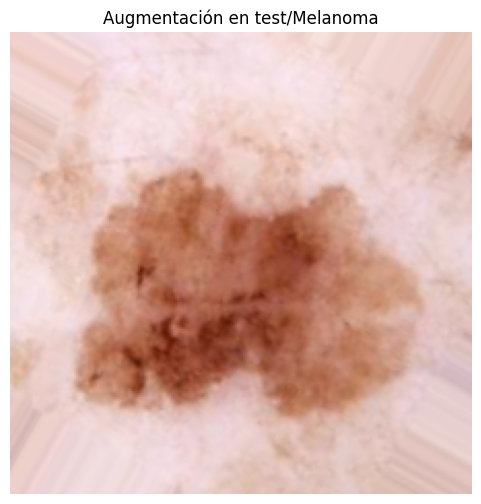

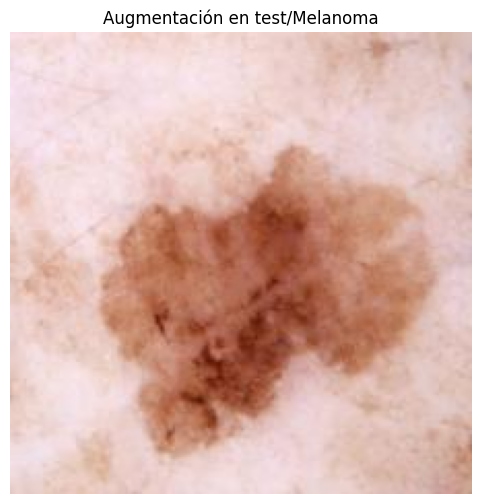

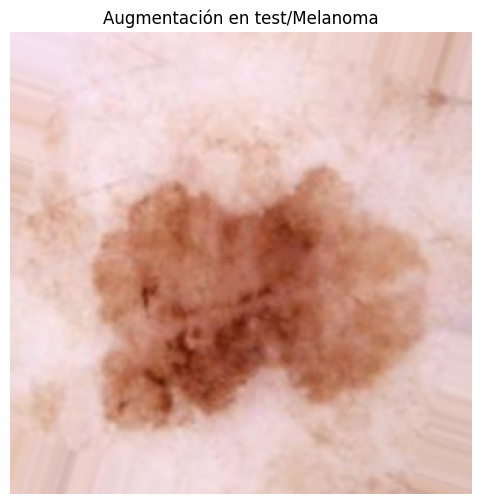

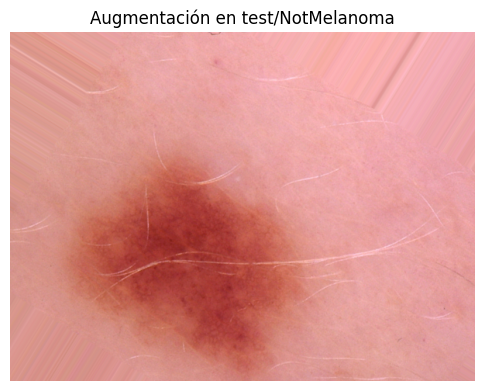

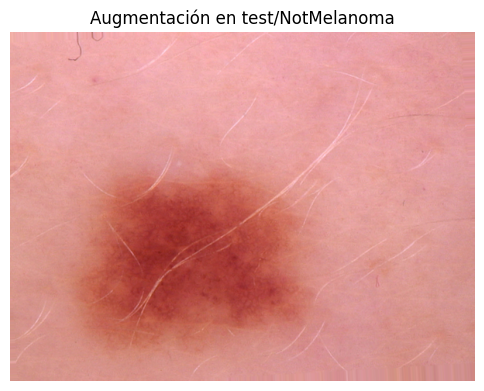

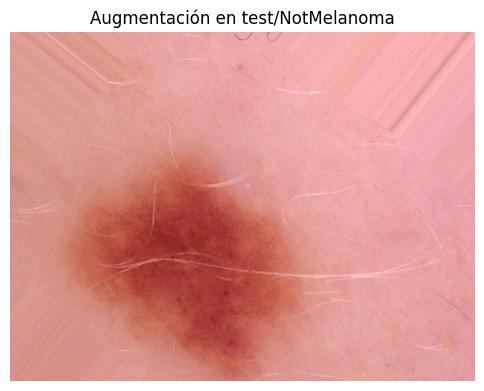

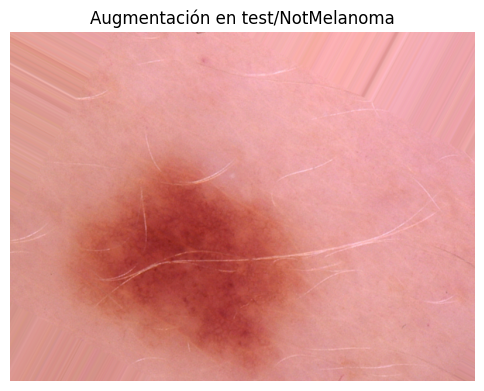

In [18]:
# Ruta base a las carpetas con las imágenes
base_folder = "melanomaornot"
sets = ['train', 'valid', 'test']
classes = ['Melanoma', 'NotMelanoma']

datagen = ImageDataGenerator(rotation_range=40)

for set_name in sets:
    for class_name in classes:
        image_folder = os.path.join(base_folder, set_name, class_name)
        img = load_img(os.path.join(image_folder, os.listdir(image_folder)[0]))  # Tomar la primera imagen
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        # Generar imágenes augmentadas
        i = 0
        for batch in datagen.flow(x, batch_size=1):
            plt.figure(figsize=(6, 6))
            plt.imshow(batch[0].astype('uint8'))
            plt.axis('off')
            plt.title(f'Augmentación en {set_name}/{class_name}')
            plt.show()
            i += 1
            if i >= 4:  # Mostrar 4 imágenes augmentadas
                break